# Bag of Words Meets Bags of Popcorn

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2) Loading data

In [4]:
train_data = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [5]:
train_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [6]:
train_data.shape

(25000, 3)

In [7]:
train_data.iloc[0].review

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
train_data['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [9]:
test_data = pd.read_csv('testData.tsv', sep='\t')

In [10]:
test_data.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


# 3) Getting to know data

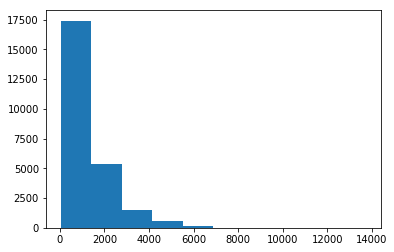

In [11]:
# Review length
train_data['review_length'] = train_data.review.apply(len)

p = plt.hist(train_data.review_length.values)

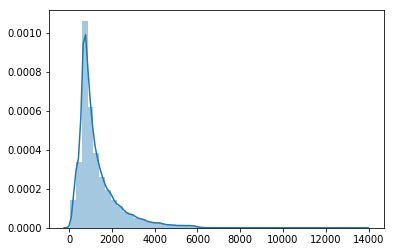

In [12]:
p = sns.distplot(train_data.review_length.values)

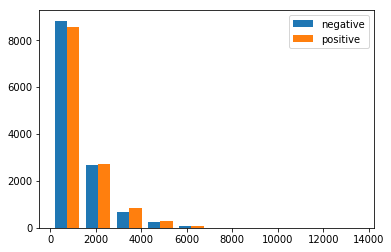

In [13]:
p = plt.hist([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], label=['negative', 'positive'])
plt.legend()

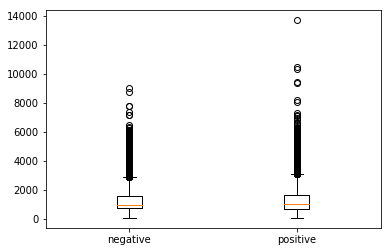

In [14]:
bp = plt.boxplot([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], labels=['negative', 'positive'])

In [15]:
# Negative reviews
train_data[train_data.sentiment==0].describe()

,sentiment,review_length
count,12500.0,12500.000000
mean,0.0,1305.721920
std,0.0,959.142634
min,0.0,52.000000
25%,0.0,711.000000
50%,0.0,978.000000
75%,0.0,1569.250000
max,0.0,8999.000000


In [16]:
# Positive reviews
train_data[train_data.sentiment==1].describe()

,sentiment,review_length
count,12500.0,12500.000000
mean,1.0,1349.699200
std,0.0,1048.890394
min,1.0,70.000000
25%,1.0,695.000000
50%,1.0,984.000000
75%,1.0,1653.000000
max,1.0,13708.000000


In [17]:
# check a specific review 
train_data[train_data.review_length==52].review.all()

'This movie is terrible but it has some good effects.'

In [18]:
train_data[train_data.review_length==1308].review.all()

"If I'm going to watch a porn movie, I prefer it to have some sort of plot, and a descent dialogue. Behind Bedroom Doors is one of the few I've come across with those attributes.<br /><br />The new girl next door scams on the neighbor's human nature and weaknesses where seduction and sex concerned. Chelsea Blue,(I mean Brooke LaVelle) is the choice actress to play the part of the blackmailing seductress, and plays the part magnificently. Chelsea Blue is a very talented and extremely beautiful actress. The movie get's an overall 10 just because she is in it. Her partner in the movie, Monique Alexander is a definite cutie. The two should do more work together. In this movie, though, Monique, who plays Gigi, doesn't have a whole lot to do or say. That's too bad. She seems like she has more talent to be shared. I like the girl who was the (possible) DA's wife next. I forget her name, but she's pretty good looking, and not a bad actress. Nicole Sheridan...I'm still trying to figure out what

# 4) Word extractions

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vocab = ['awesome', 'terrible']

In [21]:
simple_vectorizer = CountVectorizer(vocabulary=vocab)
bow = simple_vectorizer.fit_transform(train_data.review).todense()

In [22]:
bow

matrix([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64)

In [23]:
words = list(simple_vectorizer.vocabulary_.keys())

In [24]:
words

['awesome', 'terrible']

In [25]:
# Convert bow to DataFrame
bow_df = pd.DataFrame(bow, index=train_data.index, columns = words)

In [26]:
# How many have neither word?
bow_df[(bow_df.awesome==0) & (bow_df.terrible==0)].count()

awesome     23276
terrible    23276
dtype: int64

In [27]:
# Join with training data
df = train_data.join(bow_df)

In [28]:
df[(df.sentiment==1) & (df.terrible>0)].count()

id               217
sentiment        217
review           217
review_length    217
awesome          217
terrible         217
dtype: int64

In [29]:
df[(df.sentiment==0) & (df.awesome>0)].count()

id               111
sentiment        111
review           111
review_length    111
awesome          111
terrible         111
dtype: int64

### Expand vocabulary

In [30]:
vocab_expand = ['awesome', 'good', 'amazing', 'interesting', 'terrible', 'bad', 'awful','boring']

In [31]:
expand_vectorizer = CountVectorizer(vocabulary=vocab_expand)
bow_expand = expand_vectorizer.fit_transform(train_data.review).todense()

In [32]:
bow_expand

matrix([[0, 0, 0, ..., 3, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# Convert bow to DataFrame
bow_expand_df = pd.DataFrame(bow_expand, index=train_data.index, columns = vocab_expand)

In [34]:
s = bow_expand_df.apply(sum, axis=1)

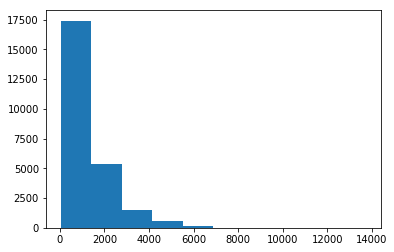

In [35]:
p = plt.hist(train_data.review_length.values)

In [36]:
s.value_counts()

0     9420
1     6921
2     4015
3     2174
4     1131
5      600
6      325
7      159
8       91
9       59
10      42
11      20
12      13
14       8
13       7
16       6
15       5
22       1
19       1
18       1
17       1
dtype: int64

In [37]:
train_data_expand = train_data.join(bow_expand_df)

In [38]:
train_data_expand.head()

,id,sentiment,review,review_length,awesome,good,amazing,interesting,terrible,bad,awful,boring
0,5814_8,1,With all this stuff going down at the moment w...,2302,0,0,0,0,0,3,0,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,0,0,0,0,0,0,0,0
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,0,0,0,0,0,0,0,1
3,3630_4,0,It must be assumed that those who praised this...,2245,0,1,0,0,0,0,0,0
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,0,0,0,0,0,0,0,0


In [39]:
train_data_expand.shape

(25000, 12)

# 5) Splitting dataset

In [40]:
columns = train_data_expand.columns[3:]
columns

Index(['review_length', 'awesome', 'good', 'amazing', 'interesting',
       'terrible', 'bad', 'awful', 'boring'],
      dtype='object')

In [41]:
X = np.asarray(train_data_expand[columns])

In [42]:
X.shape

(25000, 9)

In [43]:
y = np.asarray(train_data_expand.sentiment.transpose())

In [44]:
y.shape

(25000,)

In [45]:
y[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2019)
X_train.shape, X_test.shape

((20000, 9), (5000, 9))

In [47]:
X_train.shape, X_test.shape

((20000, 9), (5000, 9))

In [48]:
y_train.shape, y_test.shape

((20000,), (5000,))

# 6) Model

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
#predicting
y_pred = nb.predict(X_test)

In [51]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

3315 / 5000 correct


Accuracy: the number of correct matches divided by the total number of samples

### 6.1) Accuracy

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.663

### 6.2) Null Accuracy

In [53]:
# calculate the percentage of ones i.e positive sentiments
y_test.mean()

0.4982

In [54]:
# calculate the percentage of zeros
1 - y_test.mean()

0.5018

In [55]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.5018

**This is the value that if we create an average model then it should come anyway. So, we have done a better job by having 66% accuracy. It is not good enough though.**

# 7) Validation

In [56]:
from sklearn.model_selection  import cross_val_score, cross_val_predict
cv = cross_val_score(MultinomialNB(), X_train, y_train, cv=10)

In [57]:
cv.mean()

0.6720992829748207

**Confirmed our results as of our accuracy**

# 8)- Confusion matrix

In [58]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

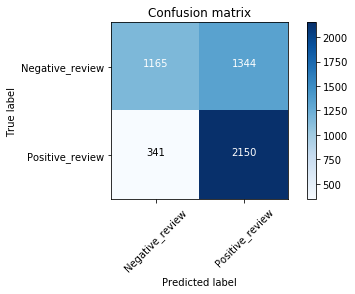

In [60]:
plot_confusion_matrix(cm, classes=['Negative_review', 'Positive_review'])

In [61]:
# slice confusion matrix into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# 9) Other models

### 9.1) Using Logistic Regression for comparison

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
y_pred = lr.predict(X_test)

In [64]:
# Accuracy
accuracy_score(y_test, y_pred)

0.6598

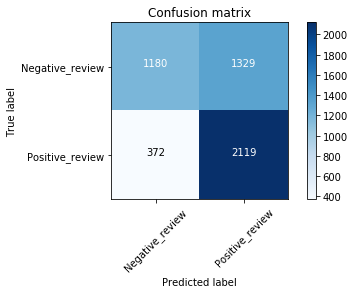

In [65]:
# Confusion matrix
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative_review', 'Positive_review'])

### 9.2) Using Random Forest for comparison

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 10)

rf.fit(X=X_train, y = y_train)
y_predict = rf.predict(X_test)

In [67]:
print(y_predict[:10])

[1 1 1 1 1 1 0 1 0 1]


In [68]:
# Accuracy
accuracy_score(y_test, y_predict)

0.6512

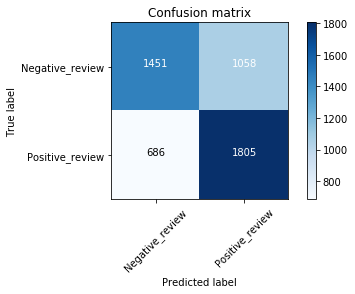

In [69]:
# Confusion matrix
cm=confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, classes=['Negative_review', 'Positive_review'])

**Random Forest does not seem to be very positive as well. But, if we tune model a little**

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf = 20, min_samples_split = 20)

rf.fit(X=X_train, y = y_train)
y_predict = rf.predict(X_test)

In [71]:
# Accuracy
accuracy_score(y_test, y_predict)

0.6554

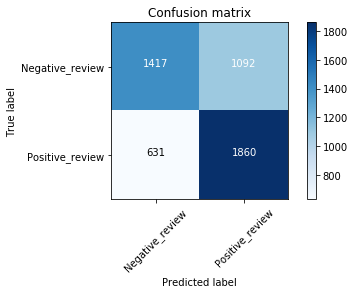

In [72]:
# Confusion matrix
cm=confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, classes=['Negative_review', 'Positive_review'])

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf = 50, min_samples_split = 50)

rf.fit(X=X_train, y = y_train)
y_predict = rf.predict(X_test)

In [74]:
# Accuracy
accuracy_score(y_test, y_predict)

0.658

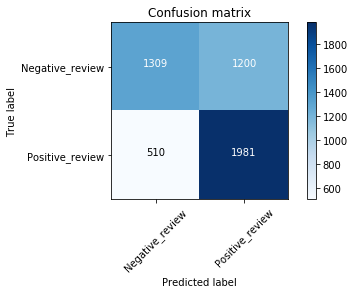

In [75]:
# Confusion matrix
cm=confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, classes=['Negative_review', 'Positive_review'])

# 9) ROC curve

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, _ = roc_curve(y_test, y_predict)

In [77]:
roc_auc_score(y_test, y_predict)

0.6584923740611679

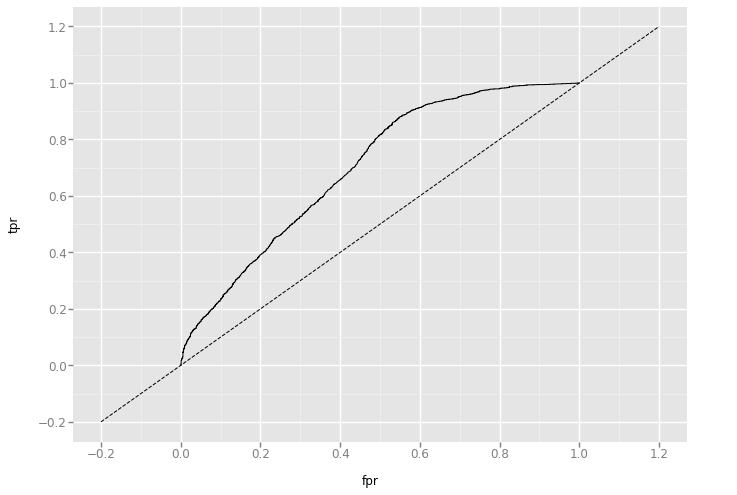

<ggplot: (-9223371884264875881)>

In [78]:
from ggplot import *

preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

# 10) classification threshold

In [79]:
# print the first 10 predicted responses
rf.predict(X_test)[0:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [80]:
# print the first 10 predicted probabilities of class membership
rf.predict_proba(X_test)[0:10, :]

array([[0.24480788, 0.75519212],
       [0.21600171, 0.78399829],
       [0.29295708, 0.70704292],
       [0.50410177, 0.49589823],
       [0.26294762, 0.73705238],
       [0.46604167, 0.53395833],
       [0.70677953, 0.29322047],
       [0.37034063, 0.62965937],
       [0.69742323, 0.30257677],
       [0.37432987, 0.62567013]])

In [81]:
# print the first 10 predicted probabilities for class 1
rf.predict_proba(X_test)[0:10, 1]

array([0.75519212, 0.78399829, 0.70704292, 0.49589823, 0.73705238,
       0.53395833, 0.29322047, 0.62965937, 0.30257677, 0.62567013])

In [82]:
# store the predicted probabilities for class 1
y_pred_prob = rf.predict_proba(X_test)[:, 1]

In [83]:
#plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequency')

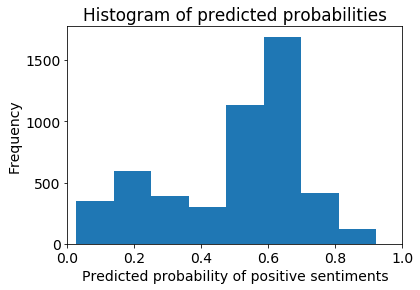

In [84]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of positive sentiments')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the **sensitivity** of the classifier.<br>
By default, value is 0.5

In [85]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [86]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.75519212, 0.78399829, 0.70704292, 0.49589823, 0.73705238,
       0.53395833, 0.29322047, 0.62965937, 0.30257677, 0.62567013])

In [87]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [88]:
# previous confusion matrix (default threshold of 0.5)
print(cm)

[[1309 1200]
 [ 510 1981]]


In [89]:
# new confusion matrix (threshold of 0.3)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 916 1593]
 [ 174 2317]]


In [90]:
print(metrics.recall_score(y_test, y_pred_class))

0.93014853472501


In [91]:
print(metrics.precision_score(y_test, y_pred_class))

0.5925831202046036


In [92]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.6466


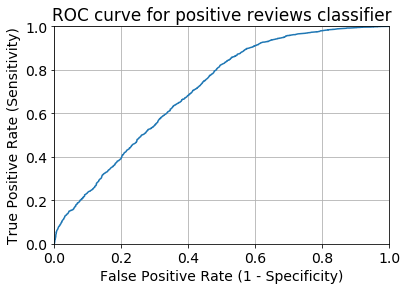

In [93]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for positive reviews classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [94]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [95]:
evaluate_threshold(0.5)

Sensitivity: 0.7952629466077881
Specificity: 0.5217218015145476


In [96]:
evaluate_threshold(0.3)

Sensitivity: 0.93014853472501
Specificity: 0.365085691510562


# 11) AUC Curve

In [97]:
#first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7077210120643164


In [98]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y, cv=10, scoring='roc_auc').mean()

0.708168

#  Submission to Kaggle

In [99]:
test_data = pd.read_csv('testData.tsv', sep='\t')

In [100]:
test_data.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [101]:
test_data['review_length'] = test_data.review.apply(len)

In [102]:
# Do the same feature extraction with the test data

from sklearn.feature_extraction.text import CountVectorizer
vocab_expand = ['awesome', 'good', 'amazing', 'interesting', 'terrible', 'bad', 'awful','boring']
expand_vectorizer = CountVectorizer(vocabulary=vocab_expand)
bow_expand = expand_vectorizer.fit_transform(test_data.review).todense()
words_expand = list(expand_vectorizer.vocabulary_.keys())
bow_expand_df = pd.DataFrame(bow_expand, index=test_data.index, columns = words_expand)
test_data_expand = test_data.join(bow_expand_df)
test_data_expand.to_csv('testDataFeatures.tsv', sep='\t')

In [103]:
predictions = rf.predict(np.asarray(test_data_expand[columns]))

In [104]:
submission = pd.DataFrame({"id": test_data.id, "sentiment": predictions})

In [105]:
submission.head()

,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,1
4,12128_7,1


In [106]:
submission.to_csv('submission_kaggle.tsv', sep='\t')